# Heuristic_analysis





First let's run each heuristic against the course improved heuristic and compare the result performance.

TODO:
We also count the number of exception catch

In [1]:
from tournament import play_round, Agent
from sample_players import RandomPlayer, improved_score
from game_agent import *
from student_heuristics import combined_improved_density_at_end, diff_density 
from student_heuristics import improved_with_sleep, combined_improved_and_density, improved_agressive, \
                                improved_preserving, distance_to_center



CUSTOM_ARGS = {"method": 'alphabeta', 'iterative': False}
agentStudent = Agent(CustomPlayer(score_fn=improved_with_sleep, **CUSTOM_ARGS), "Slow improve")
agentStudent2 = Agent(CustomPlayer(score_fn=combined_improved_density_at_end, **CUSTOM_ARGS), "combined improved")
agentStudent3 = Agent(CustomPlayer(score_fn=distance_to_center, **CUSTOM_ARGS), "distance to center")

agentRandom = Agent(RandomPlayer(), "Random")
agentUdacity = Agent(CustomPlayer(score_fn=improved_score, iterative=False), "Udacity improved")

In [1]:
from tournament import *
HEURISTICS = [("Null", null_score),
              ("Open", open_move_score),
              ("Improved", improved_score)]
AB_ARGS = {"search_depth": 5, "method": 'alphabeta', "iterative": False}
MM_ARGS = {"search_depth": 3, "method": 'minimax', "iterative": False}
CUSTOM_ARGS = {"method": 'alphabeta', 'iterative': True}
# For just comparing the correctness of heuristic.. using a shart search depth could help
#CUSTOM_ARGS = {"method": 'minimax', 'iterative': False, 'search_depth': 3}

# Create a collection of CPU agents using fixed-depth minimax or alpha beta
# search, or random selection.  The agent names encode the search method
# (MM=minimax, AB=alpha-beta) and the heuristic function (Null=null_score,
# Open=open_move_score, Improved=improved_score). For example, MM_Open is
# an agent using minimax search with the open moves heuristic.
mm_agents = [Agent(CustomPlayer(score_fn=h, **MM_ARGS),
                   "MM_" + name) for name, h in HEURISTICS]
ab_agents = [Agent(CustomPlayer(score_fn=h, **AB_ARGS),
                   "AB_" + name) for name, h in HEURISTICS]
random_agents = [Agent(RandomPlayer(), "Random")]

# ID_Improved agent is used for comparison to the performance of the
# submitted agent for calibration on the performance across different
# systems; i.e., the performance of the student agent is considered
# relative to the performance of the ID_Improved agent to account for
# faster or slower computers.


In [2]:
test_agents = [Agent(CustomPlayer(score_fn=combined_improved_density_at_end, **CUSTOM_ARGS), "Combined_improved_and_density"),
               Agent(CustomPlayer(score_fn=diff_density, **CUSTOM_ARGS), "Diff_density"),
             #  Agent(CustomPlayer(score_fn=improved_with_sleep, **CUSTOM_ARGS), "ID_Improved_slow"),
               Agent(CustomPlayer(score_fn=distance_to_center, **CUSTOM_ARGS), "Distance_to_center"),
               Agent(CustomPlayer(score_fn=improved_score, **CUSTOM_ARGS), "ID_Improved")
               ]


In [83]:
full_res = {}
NUM_MATCHES = 100 
for agentUT in test_agents:
    print("")
    print("*************************")
    print("{:^25}".format("Evaluating: " + agentUT.name))
    print("*************************")
    agents = random_agents + mm_agents + ab_agents + [agentUT]
    #agents = random_agents + mm_agents + [agentUT]

    win_ratio, res = play_round(agents, NUM_MATCHES)
    full_res[agentUT.name] = res

    print("\n\nResults:")
    print("----------")
    print("{!s:<15}{:>10.2f}%".format(agentUT.name, win_ratio))



*************************
Evaluating: Combined_improved
*************************

Playing Matches:
----------
  Match 1: Combined_improved vs   Random    

Process ForkPoolWorker-171:
Process ForkPoolWorker-172:
Process ForkPoolWorker-170:
Process ForkPoolWorker-169:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/lgeorge/anaconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/lgeorge/anaconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/lgeorge/anaconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/lgeorge/anaconda3/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/lgeorge/anaconda3/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/lgeorge/anaconda3/lib/python3.5/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))

KeyboardInterrupt: 

In [6]:
print(full_res)
full_res_bis = full_res.copy()

{'Combined_improved': {'vs_MM_Null': {'p2': 4.0, 'p1': 0.0}, 'vs_MM_Open': {'p2': 3.0, 'p1': 1.0}, 'vs_AB_Improved': {'p2': 2.0, 'p1': 2.0}, 'vs_MM_Improved': {'p2': 4.0, 'p1': 0.0}, 'vs_Random': {'p2': 3.0, 'p1': 1.0}, 'vs_AB_Null': {'p2': 3.0, 'p1': 1.0}, 'vs_AB_Open': {'p2': 3.0, 'p1': 1.0}}, 'Diff_density': {'vs_MM_Null': {'p2': 3.0, 'p1': 1.0}, 'vs_MM_Open': {'p2': 4.0, 'p1': 0.0}, 'vs_AB_Improved': {'p2': 3.0, 'p1': 1.0}, 'vs_MM_Improved': {'p2': 3.0, 'p1': 1.0}, 'vs_Random': {'p2': 4.0, 'p1': 0.0}, 'vs_AB_Null': {'p2': 4.0, 'p1': 0.0}, 'vs_AB_Open': {'p2': 4.0, 'p1': 0.0}}, 'ID_Improved': {'vs_MM_Null': {'p2': 3.0, 'p1': 1.0}, 'vs_MM_Open': {'p2': 3.0, 'p1': 1.0}, 'vs_AB_Improved': {'p2': 4.0, 'p1': 0.0}, 'vs_MM_Improved': {'p2': 3.0, 'p1': 1.0}, 'vs_Random': {'p2': 4.0, 'p1': 0.0}, 'vs_AB_Null': {'p2': 4.0, 'p1': 0.0}, 'vs_AB_Open': {'p2': 4.0, 'p1': 0.0}}}


In [103]:
import pandas as pd
import matplotlib
from matplotlib import pyplot

def get_data_frame(input_dict):
    frames = []
    methods = []
    for key, d in input_dict.items():
        methods.append(key)
        #frames.append(pd.DataFrame.from_dict(val, orient='index'))
        frames.append(pd.DataFrame.from_dict(d, orient='index'))
    df = pd.concat(frames, keys=methods)
    df = pd.DataFrame(df.to_records())
    df['win_rate'] = df['p2'] / (df['p2'] + df['p1'])
    return df


<IPython.core.display.Javascript object>


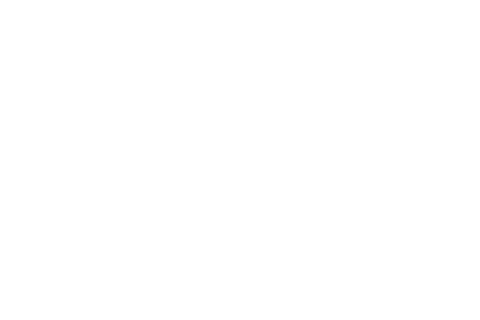

<IPython.core.display.Javascript object>


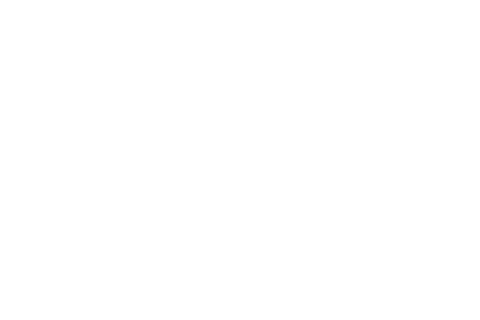

AttributeError: Unknown property column

In [87]:
df = get_data_frame(full_res)
win_percentage = df.groupby('level_0').mean()
plt.figure()
df.plot(kind='bar', column=['win_rate'], by='level_0')
#win_percentage['win_rate'].plot(kind='bar')

In [90]:
import numpy as np
df.groupby(['level_0']).aggregate(np.mean)

level_0
Combined_improved    0.785714
Diff_density         0.892857
ID_Improved          0.892857
Name: win_rate, dtype: float64

<IPython.core.display.Javascript object>


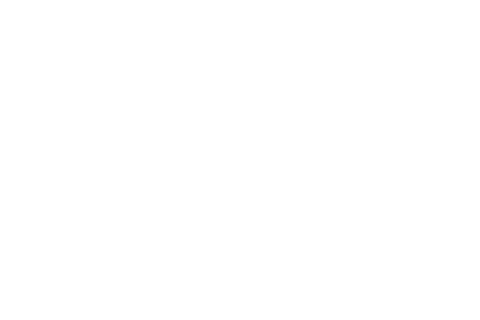

AttributeError: Unknown property column

<IPython.core.display.Javascript object>


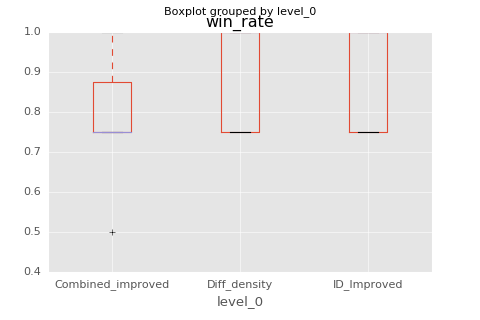

level_0
Combined_improved    0.785714
Diff_density         0.892857
ID_Improved          0.892857
Name: win_rate, dtype: float64


'\\begin{tabular}{lrrr}\n\\toprule\n{} &        p2 &        p1 &  win\\_rate \\\\\nlevel\\_0           &           &           &           \\\\\n\\midrule\nCombined\\_improved &  3.142857 &  0.857143 &  0.785714 \\\\\nDiff\\_density      &  3.571429 &  0.428571 &  0.892857 \\\\\nID\\_Improved       &  3.571429 &  0.428571 &  0.892857 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [98]:
%matplotlib notebook
#pd.options.display.mpl_style = 'default'

from matplotlib import pyplot as plt
plt.style.use('ggplot')
df.boxplot(by='level_0', column=['win_rate'])
pyplot.show()

# groupped by level and average table
import numpy as np
print(df.groupby(['level_0']).aggregate(np.mean)['win_rate'])
# latex table:
df.groupby(['level_0']).aggregate(np.mean).to_latex()

In [214]:
%matplotlib notebook
#pd.options.display.mpl_style = 'default'
pd.options.display.float_format = '{:,.2%}'.format
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
def generate_report_graph(data):
    ax = data.boxplot(by='level_0', column=['win_rate'])
    pyplot.title('')
    pyplot.suptitle('')

    ax.get_figure().savefig('figure.pdf')

    pyplot.show()
    
    # groupped by level and average table
    print(data.groupby(['level_0']).aggregate(np.mean)['win_rate'])
    # latex table:
    print(data.groupby(['level_0']).aggregate(np.mean).to_latex())
    
    df3 = data.ix[:, df.columns - ['p1', 'p2']]

    print("Displaying final table")
    res = df3.groupby(['level_1', 'level_0']).aggregate(np.mean)
    pd.options.display.float_format = '{:,.2%}'.format
    return res.unstack()
    
    

<IPython.core.display.Javascript object>


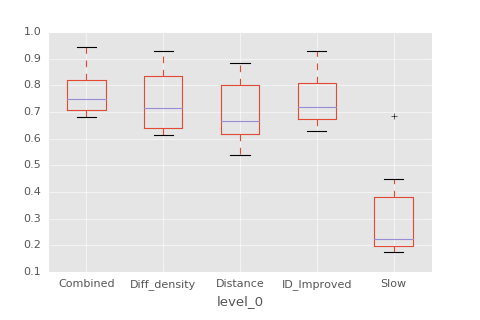

level_0
Combined       77.57%
Diff_density   74.32%
Distance       70.39%
ID_Improved    74.86%
Slow           32.07%
Name: win_rate, dtype: float64
\begin{tabular}{lrrr}
\toprule
{} &         p2 &         p1 &  win\_rate \\
level\_0      &            &            &           \\
\midrule
Combined     & 31,028.57\% &  8,971.43\% &    77.57\% \\
Diff\_density & 29,728.57\% & 10,271.43\% &    74.32\% \\
Distance     & 28,157.14\% & 11,842.86\% &    70.39\% \\
ID\_Improved  & 29,942.86\% & 10,057.14\% &    74.86\% \\
Slow         & 12,828.57\% & 27,171.43\% &    32.07\% \\
\bottomrule
\end{tabular}

Displaying final table
\begin{tabular}{lrrrrr}
\toprule
{} & win\_rate &              &          &             &        \\
level\_0 & Combined & Diff\_density & Distance & ID\_Improved &   Slow \\
level\_1        &          &              &          &             &        \\
\midrule
vs\_AB\_Improved &   68.25\% &       61.75\% &   54.00\% &      62.75\% & 17.75\% \\
vs\_AB\_Null     &   78.50\

/home/lgeorge/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/lgeorge/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [217]:
import json
with open('example.json', 'r') as f:
    data = json.load(f)
data
df2 = get_data_frame(data)
print(generate_report_graph(df2).to_latex())

In [147]:
df3 = df2.ix[:, df.columns - ['p1', 'p2']]
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(df))] # <-- Quick gradient example along the Red/Green dimensions.

for name, group in df3.groupby('level_1'):
    print(name)
    #group.plot(x='level_1', stacked=True)
    print(group)
    pyplot.show()
    break

vs_AB_Improved
                             level_0         level_1  win_rate
0   combined_improved_density_at_end  vs_AB_Improved    0.6825
7                       Diff_density  vs_AB_Improved    0.6175
14                       ID_Improved  vs_AB_Improved    0.6275
21                     Combined_full  vs_AB_Improved    0.6225


/home/lgeorge/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


In [164]:
res = df3.groupby(['level_1', 'level_0']).aggregate(np.mean)
pd.options.display.float_format = '{:,.2%}'.format
res.unstack()

win_rate                           \
level_0        Combined_full Diff_density ID_Improved   
level_1                                                 
vs_AB_Improved        62.25%       61.75%      62.75%   
vs_AB_Null            81.25%       80.00%      79.00%   
vs_AB_Open            66.25%       61.50%      66.75%   
vs_MM_Improved        65.25%       66.00%      68.00%   
vs_MM_Null            85.00%       86.75%      82.75%   
vs_MM_Open            70.00%       71.50%      72.00%   
vs_Random             94.25%       92.75%      92.75%   

                                                 
level_0        combined_improved_density_at_end  
level_1                                          
vs_AB_Improved                           68.25%  
vs_AB_Null                               78.50%  
vs_AB_Open                               71.00%  
vs_MM_Improved                           70.25%  
vs_MM_Null                               85.75%  
vs_MM_Open                               75.00%  
vs_Random                                94.25%